In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np


In [2]:
# custom imports 
from column import *
from read_file import read_file
from readinLatLong import get_foldernames

In [86]:
fnames = get_foldernames()
print (fnames.keys())
lons = np.sort(np.unique([float(key[0]) for key in fnames.keys()]))
lats = np.sort(np.unique([float(key[1]) for key in fnames.keys()]))
print (len(fnames.keys()))
print (type(lats[0]))
print (lons)
print (len(lats)*len(lons))
print (data.keys())

dict_keys([('-105', '67.5'), ('-175', '60'), ('-15', '0'), ('-15', '45'), ('-30', '67.5'), ('150', '22.5'), ('105', '0'), ('150', '45'), ('150', '0'), ('75', '0'), ('165', '45'), ('-45', '67.5'), ('-90', '45'), ('90', '67.5'), ('-135', '45'), ('75', '45'), ('45', '22.5'), ('135', '45'), ('105', '22.5'), ('-120', '22.5'), ('105', '67.5'), ('135', '67.5'), ('-150', '0'), ('135', '0'), ('60', '22.5'), ('120', '45'), ('90', '0'), ('65', '45'), ('-15', '67.5'), ('-90', '30'), ('-30', '0'), ('-180', '45'), ('120', '67.5'), ('-60', '22.5'), ('-90', '0'), ('-165', '22.5'), ('-165', '0'), ('150', '67.5'), ('-165', '45'), ('165', '0'), ('165', '67.5'), ('105', '45'), ('0', '67.5'), ('30', '0'), ('45', '67.5'), ('-180', '67.5'), ('-180', '0'), ('-45', '45'), ('0', '0'), ('-90', '22.5'), ('-75', '22.5'), ('-90', '67.5'), ('120', '0'), ('15', '22.5')])
54
<class 'numpy.float64'>
[-180. -175. -165. -150. -135. -120. -105.  -90.  -75.  -60.  -45.  -30.
  -15.    0.   15.   30.   45.   60.   65.   75.

In [90]:
datafile = 'out3_chem1.dat'
keyword = b'T'

# Z is our mapping variable - choose what variable is to be interpolated and mapped
#Z_a = np.zeros((lats,lons))
#Z_a = T
Z = np.zeros((len(lats),len(lons)))

print (Z.shape)

for key in fnames.keys():
    lon, lat = key
    fname = fnames[key] 
    data = read_file(fname + datafile)
    
    #print (data[b'z'])
    #print (data.keys())
    output = integrate_column(data, keyword)
    #print (np.where(lons == lon)[0])
    latind = np.where(lats == float(lat))[0][0]
    lonind = np.where(lons == float(lon))[0][0]
    print (latind,lonind)
    Z[latind][lonind] = output

Z = np.log10(np.maximum(Z,1e-99))
#Z[Z==0.0] = np.nan



(6, 26)
5 6
4 1
0 12
3 12
5 11
1 24
0 21
3 24
0 24
0 19
3 25
5 10
3 7
5 20
3 4
3 19
1 16
3 23
1 21
1 5
5 21
5 23
0 3
0 23
1 17
3 22
0 20
3 18
5 12
2 7
0 11
3 0
5 22
1 9
0 7
1 2
0 2
5 24
3 2
0 25
5 25
3 21
5 13
0 15
5 16
5 0
0 0
3 10
0 13
1 7
1 8
5 7
0 22
1 14


In [88]:
print (Z)



[[ 11.92309888 -99.          11.91219895  10.9990688  -99.         -99.
  -99.          12.02952521 -99.         -99.         -99.          12.357358
   12.36757039  12.37433719 -99.          12.37515129 -99.         -99.
  -99.          12.31921521  12.16251941  12.00061572  11.99201629
   11.34743541  12.00710768  11.95016919]
 [-99.         -99.          11.84742782 -99.         -99.          11.85169239
  -99.          12.03279706  12.23175205  12.28196362 -99.         -99.
  -99.         -99.          12.36171094 -99.          12.35267568
   12.33797338 -99.         -99.         -99.          11.9944769  -99.
  -99.          11.8517225  -99.        ]
 [-99.         -99.         -99.         -99.         -99.         -99.
  -99.          12.02952521 -99.         -99.         -99.         -99.
  -99.         -99.         -99.         -99.         -99.         -99.
  -99.         -99.         -99.         -99.         -99.         -99.
  -99.         -99.        ]
 [ 11.82055741 -99.

ValueError: operands could not be broadcast together with shapes (6,26) (26,6) 

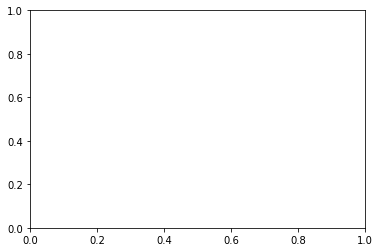

In [92]:
# X,Y grid is length lons * lats - Z array has to be shape (len(Y),len(X))
X, Y = np.meshgrid(np.sort(lons),np.sort(lats))

# Initilise figure object
fig = plt.figure()
ax = fig.add_subplot(111)

# we use the basemap package for easier global variable plotting
# install with anaconda using: conda install -c conda-forge basemap
# for availible projections see: https://matplotlib.org/basemap/users/mapsetup.html
# lon_0 is the longitude of the zero (center) point
m = Basemap(projection='kav7',lon_0=0,resolution=None)

# Find levels between max and min of mapped variable
nlev = 20
#levels = np.linspace(np.log10(1e-10),np.amax(Z),nlev)
levels = np.linspace(np.amin(Z[Z>0]),np.amax(Z),nlev)
# Colour map
cmap = plt.cm.RdYlBu_r

# Plot data as filled contour
CS = m.contourf(X,Y,Z,levels=levels,extend='both',cmap=cmap,latlon=True)

# Colour bar and formatting
for c in CS.collections:
    c.set_edgecolor("face")
CB = plt.colorbar(CS, orientation='horizontal', format="%d")
CB.set_label(keyword, size=16)
CB.ax.tick_params(labelsize=12)

# Title is chosen pressure level
#plt.title('{:0.1f}'.format(P_plot*1.0e3) + ' mbar',fontsize=16)

# Increase size of labels
plt.tick_params(axis='both', which='major', labelsize=16)

# String formatting function
def fmtfunc(inlon):
    string = r'{:g}'.format(inlon)+r'$^{\circ}$'
    #print string
    return string

# Plot lat-lon lines on map
color1='k'
meridians = np.arange(0.,360.,90)
m.drawmeridians(meridians,labels=[False,False,False,True],labelstyle=None,
                fmt=fmtfunc,dashes=[3,3],color=color1,fontsize=16)
parallels = np.arange(-90.,90,30)
m.drawparallels(parallels,labels=[True,False,False,False],labelstyle='+/-',
                dashes=[3,3],color=color1,fontsize=16)

# Save figure
plt.tight_layout(pad=1.05, h_pad=None, w_pad=None, rect=None)
plt.savefig('HAT-P-7b_T_map_initial.pdf',dpi=144,bbox_inches='tight')

# Show figure
plt.show()

